In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Load cleaned stock datasets into DataFrames
aapl_df = pd.read_csv("../data/cleaned_AAPL_historical_data.csv")
amzn_df = pd.read_csv("../data/cleaned_AMZN_historical_data.csv")
goog_df = pd.read_csv("../data/cleaned_GOOG_historical_data.csv")
meta_df = pd.read_csv("../data/cleaned_META_historical_data.csv")
msft_df = pd.read_csv("../data/cleaned_MSFT_historical_data.csv")
nvda_df = pd.read_csv("../data/cleaned_NVDA_historical_data.csv")
tsla_df = pd.read_csv("../data/cleaned_TSLA_historical_data.csv")

# Load analyst ratings
ratings_df = pd.read_csv("../data/cleaned_analyst_ratings.csv")

# Display shape of datasets to verify
print("AAPL:", aapl_df.shape)
print("AMZN:", amzn_df.shape)
print("GOOG:", goog_df.shape)
print("META:", meta_df.shape)
print("MSFT:", msft_df.shape)
print("NVDA:", nvda_df.shape)
print("TSLA:", tsla_df.shape)
print("Analyst Ratings:", ratings_df.shape)

AAPL: (10998, 9)
AMZN: (6846, 9)
GOOG: (5020, 9)
META: (2926, 9)
MSFT: (9672, 9)
NVDA: (6421, 9)
TSLA: (3545, 9)
Analyst Ratings: (1048574, 5)


In [2]:
# Check missing values in each dataset
for name, df in zip(
    ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA", "Analyst Ratings"],
    [aapl_df, amzn_df, goog_df, meta_df, msft_df, nvda_df, tsla_df, ratings_df]
):
    print(f"{name} missing values:\n", df.isnull().sum(), "\n")

AAPL missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

AMZN missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

GOOG missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

META missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

MSFT missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64 

NVDA 

In [3]:
# Summary stats for a sample (you can repeat for each)
aapl_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
mean,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
std,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663
min,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000


In [4]:
# Descriptive statistics for all stock data
print("AAPL\n", aapl_df.describe(), "\n")
print("AMZN\n", amzn_df.describe(), "\n")
print("GOOG\n", goog_df.describe(), "\n")
print("META\n", meta_df.describe(), "\n")
print("MSFT\n", msft_df.describe(), "\n")
print("NVDA\n", nvda_df.describe(), "\n")
print("TSLA\n", tsla_df.describe(), "\n")

# Descriptive statistics for analyst ratings — includes object columns
print("Analyst Ratings (include='all')\n", ratings_df.describe(include='all'))

AAPL
                Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits  
count  1.099800e+04  10998.000000  10998.000000  
mean   3.180806e+08      0.000752      0.001546  
std    3.354523e+08      0.011753      0.083663  
min    0.000000e+00      0.000000      0.000000  
25%    1.132545e+08      0.00000

In [6]:
print(ratings_df.columns)

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [8]:
print("Unique Tickers:", ratings_df['stock'].unique())

Unique Tickers: ['A' 'AA' 'AAC' ... 'QKOR' 'QLD' 'QLGC']


In [9]:
# Check the shape and types
print("Shape:", ratings_df.shape)
print("\nData Types:\n", ratings_df.dtypes)

# Check for null values
print("\nMissing Values:\n", ratings_df.isnull().sum())

Shape: (1048574, 5)

Data Types:
 headline     object
url          object
publisher    object
date         object
stock        object
dtype: object

Missing Values:
 headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64


In [11]:
# Reload analyst ratings if modified
ratings_df = pd.read_csv('../data/cleaned_analyst_ratings.csv')

# Preview first few rows
ratings_df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [12]:
ratings_df['date'] = pd.to_datetime(ratings_df['date'], errors='coerce')
ratings_df = ratings_df.dropna(subset=['date'])

C:\Users\User\AppData\Local\Temp\ipykernel_27684\97815200.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ratings_df['date'].dt.to_period("M").value_counts().sort_index().plot(kind='bar')


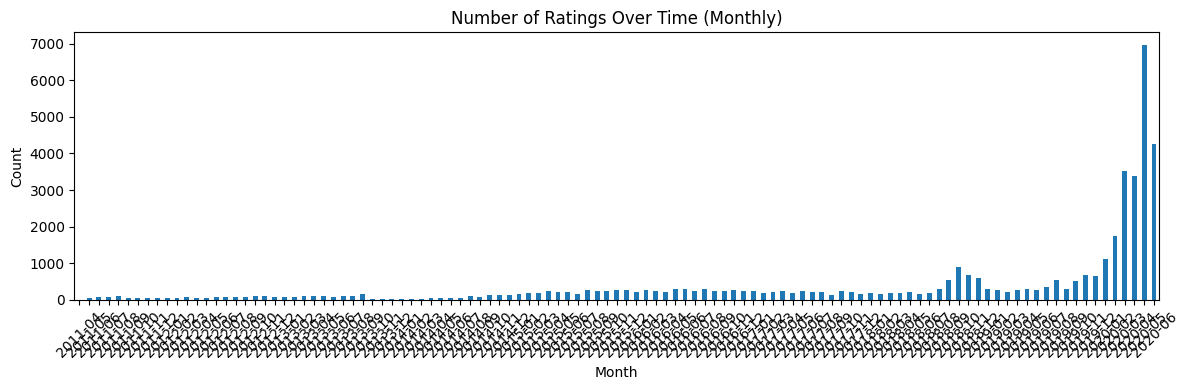

In [13]:
plt.figure(figsize=(12, 4))
ratings_df['date'].dt.to_period("M").value_counts().sort_index().plot(kind='bar')
plt.title("Number of Ratings Over Time (Monthly)")
plt.ylabel("Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

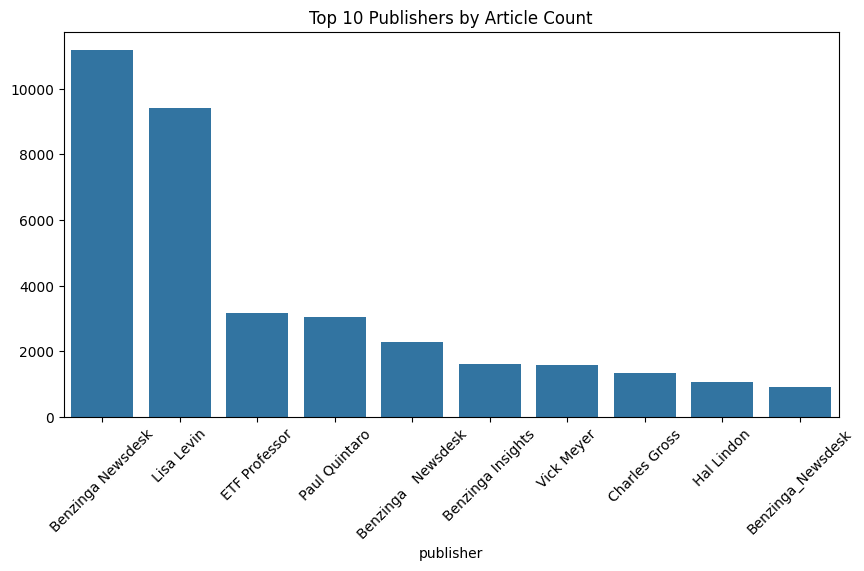

In [14]:
top_publishers = ratings_df['publisher'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title("Top 10 Publishers by Article Count")
plt.xticks(rotation=45)
plt.show()

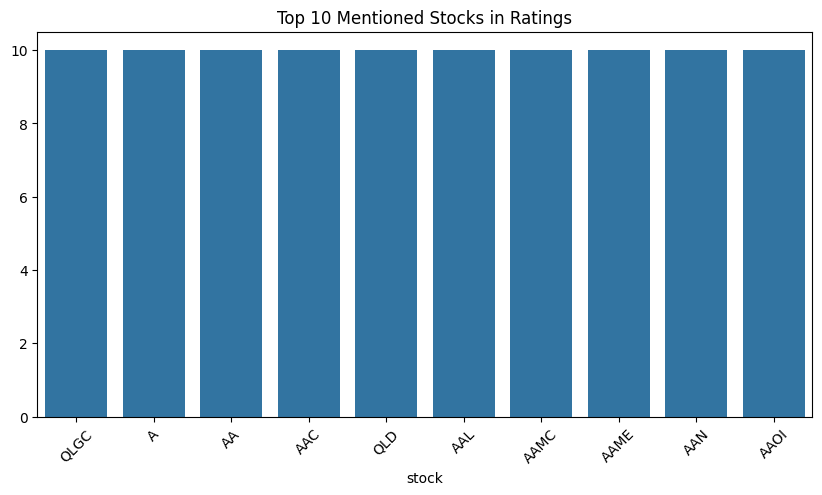

In [15]:
top_stocks = ratings_df['stock'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_stocks.index, y=top_stocks.values)
plt.title("Top 10 Mentioned Stocks in Ratings")
plt.xticks(rotation=45)
plt.show()

# Calculate headline length
ratings_df['headline_length'] = ratings_df['headline'].str.len()

# Plot headline length distribution
plt.figure(figsize=(10, 5))
sns.histplot(ratings_df['headline_length'], bins=40, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

plt.savefig('../image/headline_length_distribution.png')

Text(0.5, 0, 'Publisher')

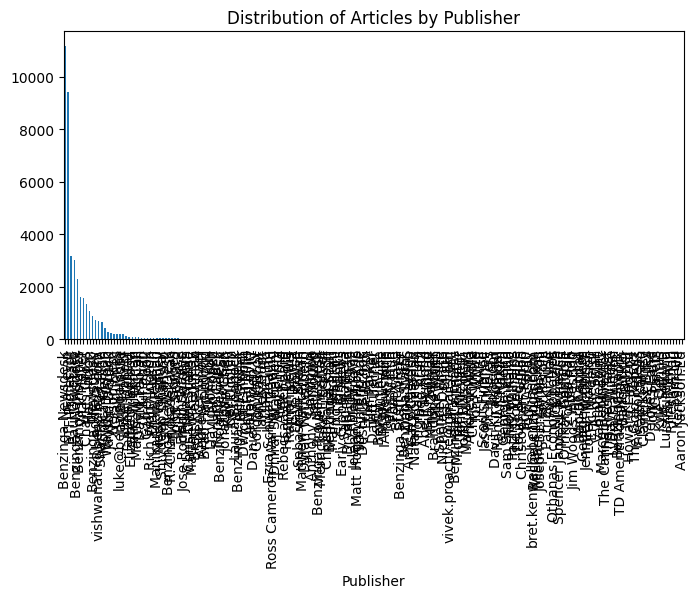

In [17]:
ratings_df['publisher'].value_counts().plot(kind='bar', figsize=(8, 4))
plt.title("Distribution of Articles by Publisher")
plt.xlabel("Publisher")

## Step 2: Exploratory Data Analysis (EDA) and Statistical Insights

We explore trends, statistics, and patterns in the stock news and price datasets.

## Step 2: Exploratory Data Analysis (EDA) and Statistical Insights

## Step 2: Exploratory Data Analysis (EDA) and Statistical Insights

This section performs EDA on stock price and analyst ratings data. It includes:
- Shape & structure verification
- Missing value checks
- Unique value counts
- Date formatting
- Statistical plots and distribution insights